# Phase relation between FGM x and y

**Created on**: April 20, 2023

#### Motivation:
What's the phase relation between fgm x and y in different configuration of magnetic field, spin plane and spin axis
#### Backgound:
In reality, boom (z axis) rotates in the spin plane with almost constant magnetic field. However, I'm assuming magnetic field can be seperated into Bpara and Bperp to the spin axis and Bperp is rotating. 
#### Overview:
- assuming spin axis on the x-y plane and B is in the spin plane
- assuming spin axis on the x-y plane and B is not in the spin plane, meaning it has both Bpara and Bperp
- assuming spin axis not on the x-y plane

In [10]:
%matplotlib widget

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# Rotation matrix for rotation around Z-axis
def rotation_matrix_z(angle):
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])

In [13]:
# Rotation matrix for rotation around Y-axis
def rotation_matrix_y(angle):
    return np.array([
        [np.cos(angle), 0, np.sin(angle)],
        [0, 1, 0],
        [-np.sin(angle), 0, np.cos(angle)]
    ])


In [14]:
# Parameters
rot_ang = 20  # Normal angle from x-axis in degrees
magnitude = 1  # Constant magnitude of the spinning vector
theta_range = np.arange(0, 2 * np.pi, 2 * np.pi / 1000)

# Initial normal vector (aligned with the X-axis)
initial_normal = np.array([1, 0, 0])

define a plane using two vectors in the plane. this spin axis is on the x-y plane

In [15]:
# Convert angle to radians
rot_ang = np.deg2rad(rot_ang)

# Calculate normal vector of the plane
normal = rotation_matrix_z(rot_ang) @ initial_normal

# Find two vectors in the plane
vector_in_plane_1 = np.cross(normal, np.array([0, 0, 1]))
vector_in_plane_2 = np.cross(normal, vector_in_plane_1)

# Normalize the vectors in the plane
vector_in_plane_1 = vector_in_plane_1 / np.linalg.norm(vector_in_plane_1)
vector_in_plane_2 = vector_in_plane_2 / np.linalg.norm(vector_in_plane_2)

## spin axis on the x-y plane with only Bperp

In [16]:
# define B perpendicular to spin axis that rotates
x = []
y = []
z = []
for theta in theta_range:
    spinning_vector = magnitude * (np.cos(theta) * vector_in_plane_1 + np.sin(theta) * vector_in_plane_2)
    x.append(spinning_vector[0])
    y.append(spinning_vector[1])
    z.append(spinning_vector[2])


plot fgm x and y

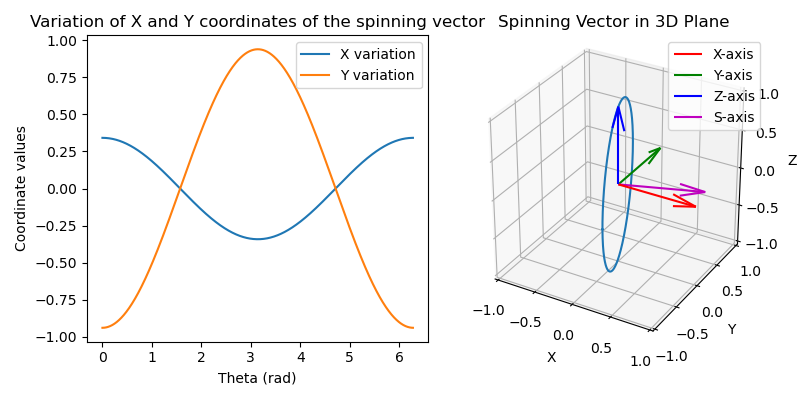

In [17]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(121)
ax1.plot(theta_range, x, label='X variation')
ax1.plot(theta_range, y, label='Y variation')
ax1.set_xlabel('Theta (rad)')
ax1.set_ylabel('Coordinate values')
ax1.legend()
ax1.set_title('Variation of X and Y coordinates of the spinning vector')

# Add the second subplot for the 3D plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x, y, z)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Spinning Vector in 3D Plane')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])
# Make X, Y, Z equal in the 3D plot
ax2.set_box_aspect([1, 1, 1])

# Draw X, Y, Z axes in the origin
ax2.quiver(0, 0, 0, 1, 0, 0, color='r', label='X-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, 0, 0, 1, color='b', label='Z-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, *normal, color='m', label='S-axis', linewidth=1.5)
ax2.legend()

plt.tight_layout()
plt.show()

#### conclusion: 
1. x and y are in phase
2. the offset of x and y are 0
3. magnitude depends on the rotation angle
4. if x and y are not orthogonal only in xy plane, meaning xz, yz are 90 deg, but xy is not 90, x and y should be in phase

## spin axis on the x-y plane with both Bpara and Bperp

In [18]:
# add both B perpendulcar and B parallel to spin axis
x = []
y = []
z = []
for theta in theta_range:
    spinning_vector = magnitude * (np.cos(theta) * vector_in_plane_1 + np.sin(theta) * vector_in_plane_2) + normal
    x.append(spinning_vector[0])
    y.append(spinning_vector[1])
    z.append(spinning_vector[2])

plot fgm x and y

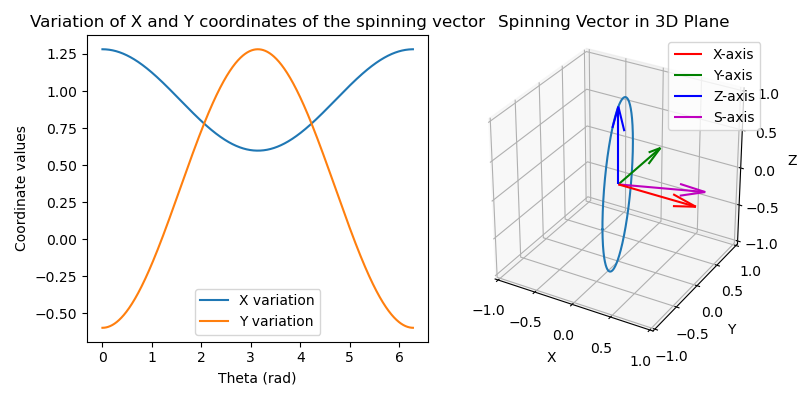

In [19]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(121)
ax1.plot(theta_range, x, label='X variation')
ax1.plot(theta_range, y, label='Y variation')
ax1.set_xlabel('Theta (rad)')
ax1.set_ylabel('Coordinate values')
ax1.legend()
ax1.set_title('Variation of X and Y coordinates of the spinning vector')

# Add the second subplot for the 3D plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x-normal[0], y-normal[1], z-normal[2]) # so that the plane centered in the origin
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Spinning Vector in 3D Plane')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])
# Make X, Y, Z equal in the 3D plot
ax2.set_box_aspect([1, 1, 1])

# Draw X, Y, Z axes in the origin
ax2.quiver(0, 0, 0, 1, 0, 0, color='r', label='X-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, 0, 0, 1, color='b', label='Z-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, *normal, color='m', label='S-axis', linewidth=1.5)
ax2.legend()

plt.tight_layout()
plt.show()

#### conclusion:
1. x and y are in phase
2. B parallel to spin axis give x and y constant offsets 

## spin axis off the x-y plane 

In [20]:
#add a angle to tilt the plane and calculate normal vecotor
rot_ang = 10  # Normal angle from x-axis in degrees
rot_ang = np.deg2rad(rot_ang)

tilt_angle = 10  # Tilt angle from the Z-axis in degrees
tilt_angle = np.deg2rad(tilt_angle)

# Calculate normal vector of the plane
normal = rotation_matrix_y(tilt_angle) @ rotation_matrix_z(rot_ang) @ initial_normal

# Find two vectors in the plane
vector_in_plane_1 = np.cross(normal, np.array([0, 0, 1]))
vector_in_plane_2 = np.cross(normal, vector_in_plane_1)

# Normalize the vectors in the plane
vector_in_plane_1 = vector_in_plane_1 / np.linalg.norm(vector_in_plane_1)
vector_in_plane_2 = vector_in_plane_2 / np.linalg.norm(vector_in_plane_2)

In [21]:
# Calculate spinning vector coordinates
x = []
y = []
z = []
for theta in theta_range:
    spinning_vector = magnitude * (np.cos(theta) * vector_in_plane_1 + np.sin(theta) * vector_in_plane_2)
    x.append(spinning_vector[0])
    y.append(spinning_vector[1])
    z.append(spinning_vector[2])

plot fgm x and fgm y

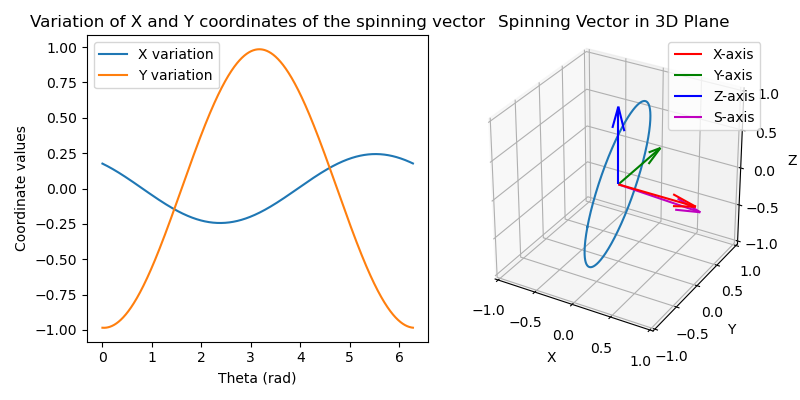

In [22]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(121)
ax1.plot(theta_range, x, label='X variation')
ax1.plot(theta_range, y, label='Y variation')
ax1.set_xlabel('Theta (rad)')
ax1.set_ylabel('Coordinate values')
ax1.legend()
ax1.set_title('Variation of X and Y coordinates of the spinning vector')

# Add the second subplot for the 3D plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x, y, z) # so that the plane centered in the origin
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Spinning Vector in 3D Plane')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])
# Make X, Y, Z equal in the 3D plot
ax2.set_box_aspect([1, 1, 1])

# Draw X, Y, Z axes in the origin
ax2.quiver(0, 0, 0, 1, 0, 0, color='r', label='X-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, 0, 0, 1, color='b', label='Z-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, *normal, color='m', label='S-axis', linewidth=1.5)
ax2.legend()

plt.tight_layout()
plt.show()

In [23]:
max_x_index = np.argmax(x)
max_y_index = np.argmax(y)
min_x_index = np.argmin(x)
min_y_index = np.argmin(y)
phase_diff_deg = np.rad2deg(theta_range[max_y_index] - theta_range[min_x_index])
print(f"X and Y phase diff: {phase_diff_deg} deg")

X and Y phase diff: 45.36 deg


#### conclusion:
when the spin axis is not on the x-y plane, the x-y phase can be anything